# Python Day 2: Python Scientific Computing

# Pandas cont.
#### Working with dataframes

In [5]:
import pandas as pd
import numpy as np

In [4]:
dates = pd.date_range('20130101', periods=6)

In [8]:
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.517776,-0.018428,-0.548433,0.338979
2013-01-02,-0.322453,1.641127,0.025027,-0.749544
2013-01-03,-0.493683,-0.956455,-0.016117,0.074856
2013-01-04,1.156910,-0.253206,0.107295,0.179756
2013-01-05,1.395810,-1.204975,1.049599,0.028845
2013-01-06,0.716609,0.648520,0.989639,0.433751


In [10]:
df = pd.DataFrame({'A': ['dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.array([3] * 8, dtype='int32'),
                   'D': np.random.randn(8),
                   'E': np.random.randn(8)})
df

,A,B,C,D,E
0,dog,one,3,1.350758,1.151918
1,cat,one,3,-0.803389,-0.110073
2,dog,two,3,-0.408845,-0.400606
3,cat,three,3,0.639434,-0.408994
4,dog,two,3,0.317245,0.557834
5,cat,two,3,-0.433767,0.264291
6,dog,one,3,-0.239010,-0.737709
7,dog,three,3,-0.032704,-0.535944


In [14]:
sub1, sub2, sub3 = df[:2], df[2:4], df[4:]
pd.concat([sub1, sub2, sub3])
sub1.append([sub2, sub3])

,A,B,C,D,E
0,dog,one,3,1.350758,1.151918
1,cat,one,3,-0.803389,-0.110073
2,dog,two,3,-0.408845,-0.400606
3,cat,three,3,0.639434,-0.408994
4,dog,two,3,0.317245,0.557834
5,cat,two,3,-0.433767,0.264291
6,dog,one,3,-0.239010,-0.737709
7,dog,three,3,-0.032704,-0.535944


In [25]:
runners = pd.DataFrame([
              {'Runner': 'Runner 1', 400: 64, 800: 128, 1200: 192, 1500: 240},
              {'Runner': 'Runner 2', 400: 80, 800: 160, 1200: 240, 1500: 300},
              {'Runner': 'Runner 3', 400: 96, 800: 192, 1200: 288, 1500: 360},
          ])
runners

,Runner,400,800,1200,1500
0,Runner 1,64,128,192,240
1,Runner 2,80,160,240,300
2,Runner 3,96,192,288,360


In [26]:
runners = pd.melt(runners, id_vars="Runner",
              value_vars=[400, 800, 1200, 1500],
              var_name="distance",
              value_name="time"
          )

In [27]:
age = pd.DataFrame([
    {"Runner": "Runner 4", "Age": 18},
    {"Runner": "Runner 2", "Age": 21},
    {"Runner": "Runner 1", "Age": 23},
    {"Runner": "Runner 3", "Age": 19},
])

In [28]:
# Add the age for each runner
runners.merge(age, on="Runner")

,Runner,distance,time,Age
0,Runner 1,400,64,23
1,Runner 1,800,128,23
2,Runner 1,1200,192,23
3,Runner 1,1500,240,23
4,Runner 2,400,80,21
5,Runner 2,800,160,21
6,Runner 2,1200,240,21
7,Runner 2,1500,300,21
8,Runner 3,400,96,19
9,Runner 3,800,192,19


In [33]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(url, index_col='Name')

In [34]:
titanic["Child"] = titanic["Age"] < 12

In [37]:
titanic.groupby(["Sex", "Child"])["Survived"].mean()

Sex     Child
female  False    0.758865
        True     0.593750
male    False    0.164510
        True     0.555556
Name: Survived, dtype: float64

## Exercise 2

In [63]:
titanic["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [64]:
largeFam = titanic["SibSp"]==titanic["SibSp"].max()
largeFamNames = titanic[largeFam]
largeFamNames

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
Name,,,,,,,,,,,,
"Sage, Master. Thomas Henry",160,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,False
"Sage, Miss. Constance Gladys",181,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,False
"Sage, Mr. Frederick",202,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,False
"Sage, Mr. George John Jr",325,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,False
"Sage, Miss. Stella Anna",793,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,False
"Sage, Mr. Douglas Bullen",847,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,False
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,False


In [73]:
largeFamNames = titanic[titanic["SibSp"]==8]#["Name"]
largeFamNames

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
Name,,,,,,,,,,,,
"Sage, Master. Thomas Henry",160,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,False
"Sage, Miss. Constance Gladys",181,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,False
"Sage, Mr. Frederick",202,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,False
"Sage, Mr. George John Jr",325,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,False
"Sage, Miss. Stella Anna",793,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,False
"Sage, Mr. Douglas Bullen",847,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,False
"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,False


In [ ]:
titanic.hist(column="Age", by="Survived", bins=25, figsize=(8,10), layout=(2,1), zorder=2, sharex=True, rwidth=0.9)

array([<AxesSubplot:title={'center':'Poor'}>,
       <AxesSubplot:title={'center':'Rich'}>], dtype=object)

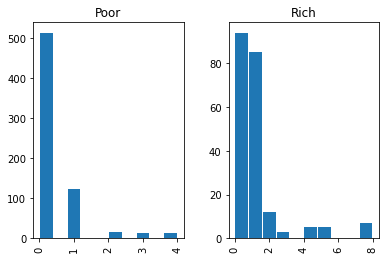

In [76]:
titanic.hist("SibSp", lambda x: "Poor" if titanic["Fare"].loc[x] < titanic["Fare"].mean() else "Rich", rwidth=0.9)

## Data visualization with Matplotlib

Text(0.5, 1.0, 'some title')

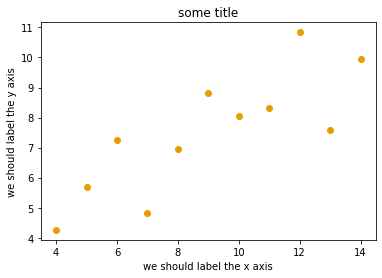

In [80]:
# this line tells Jupyter to display matplotlib figures in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

# this is dataset 1 from
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
data_x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
data_y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

fig, ax = plt.subplots()

ax.scatter(x=data_x, y=data_y, c="#E69F00")

ax.set_xlabel("we should label the x axis")
ax.set_ylabel("we should label the y axis")
ax.set_title("some title")

# uncomment the next line if you would like to save the figure to disk
# fig.savefig("my-first-plot.png")

Text(0.5, 1.0, 'some title')

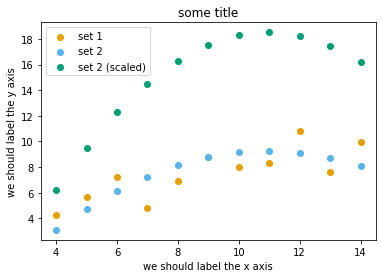

In [95]:
data2_y = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

fig, ax = plt.subplots()
ax.scatter(x=data_x, y=data_y, c="#E69F00", label="set 1")
ax.scatter(x=data_x, y=data2_y, c='#56B4E9', label="set 2")
data2_y_scaled = [y*2.0 for y in data2_y]
ax.scatter(x=data_x, y=data2_y_scaled, c='#009E73', label='set 2 (scaled)')

ax.legend()

ax.set_xlabel("we should label the x axis")
ax.set_ylabel("we should label the y axis")
ax.set_title("some title")

## Exercises: Styling and customization

#### Exercise 1

In [96]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminder_with_codes.csv"
data = pd.read_csv(url)

data_2007 = data[data["year"] == 2007]

data_2007

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


Text(0, 0.5, 'Life expectancy (years)')

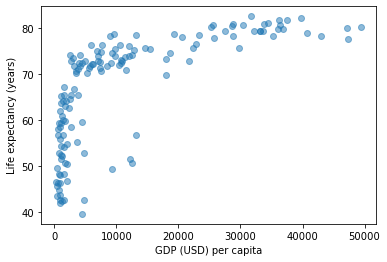

In [101]:
# Plot on a linear scale:
fig, ax = plt.subplots()

ax.scatter(x=data_2007["gdpPercap"], y=data_2007["lifeExp"], alpha=0.5)

ax.set_xlabel("GDP (USD) per capita")
ax.set_ylabel("Life expectancy (years)")

Text(0, 0.5, 'Life expectancy (years)')

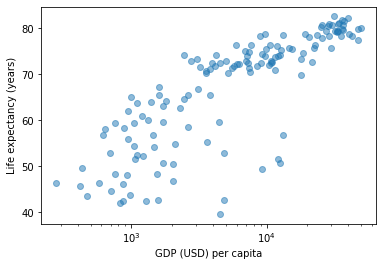

In [102]:
# Plot on a log scale:
fig, ax = plt.subplots()

ax.scatter(x=data_2007["gdpPercap"], y=data_2007["lifeExp"], alpha=0.5)
ax.set_xscale('log')

ax.set_xlabel("GDP (USD) per capita")
ax.set_ylabel("Life expectancy (years)")

#### Exercise 2

Text(0, 0.5, 'Life expectancy (years)')

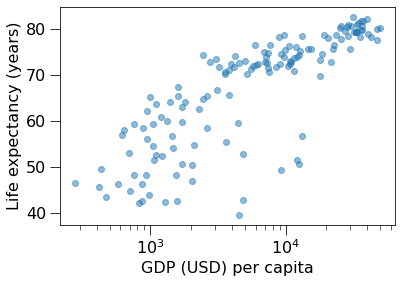

In [122]:
# Adjust axis labels:
fig, ax = plt.subplots()
plt.rcParams['font.size'] = 16
plt.tick_params(length=10, axis='both', which='major')
plt.tick_params(length=5, axis='both', which='minor')

ax.scatter(x=data_2007["gdpPercap"], y=data_2007["lifeExp"], alpha=0.5)
ax.set_xscale('log')

ax.set_xlabel("GDP (USD) per capita")
ax.set_ylabel("Life expectancy (years)")


# ax.text(fontsize=14)

#### Exercise 3
Example: Violingplot from Seaborn
https://seaborn.pydata.org/examples/wide_form_violinplot.html

[[10.25146044  6.27005437  5.78778386  3.27832843  0.88147169  1.76439276
   2.87844934  1.49695422]
 [ 8.59252953  4.00342116  3.26038963  3.15118015 -2.69725111  0.60361933
  -2.22137264 -1.86174242]
 [ 8.91148203  5.90166378  5.33019963  5.15355493  1.69574111  3.77412959
  -1.05994009  0.30581243]
 [11.80694036  6.72228869  3.01994006  1.22507744  1.03735879  1.4815929
  -1.74878711 -0.81555886]
 [ 9.68154998  7.61595527  4.9362568   3.77927361  0.64515322  0.78197539
   1.83840019  2.58965458]
 [ 7.48186894  9.56211165  7.1986894   4.631151    2.4817217   0.41335702
   3.18649062  3.52330892]
 [13.60326974  9.16447163  5.22169938  0.65189093  1.94390217  2.35415252
  -2.30627367  0.39303641]
 [10.85972739  7.92634955  2.13870262  1.74512305  1.07993994 -1.29840116
   3.74918501 -1.38902917]
 [10.65793926  6.01711901  7.67388431  5.70925017  3.21951568 -3.36581711
   0.3745072   0.97016467]
 [12.00792315  5.29845001  8.15096128  0.42766625  0.62975439  2.91130263
   0.36855848  3.6

<AxesSubplot:>

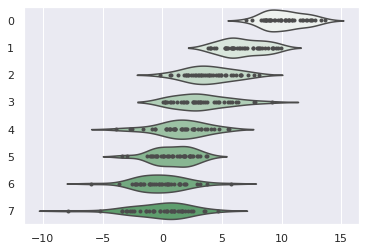

In [125]:
import numpy as np
import seaborn as sns

sns.set_theme()

# Create a random dataset across several variables
rs = np.random.default_rng(0)
n, p = 40, 8
d = rs.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

print(d)

# Show each distribution with both violins and points
sns.violinplot(data=d, palette="light:g", inner="points", orient="h")

<AxesSubplot:>

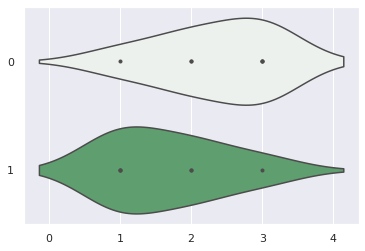

In [126]:
# import numpy as np
import seaborn as sns

sns.set_theme()

# # Create a random dataset across several variables
# rs = np.random.default_rng(0)
# n, p = 40, 8
# d = rs.normal(0, 2, (n, p))
# d += np.log(np.arange(1, p + 1)) * -5 + 10

d = [[1.0, 2.0, 2.0, 3.0, 3.0, 3.0],
     [1.0, 1.0, 1.0, 2.0, 2.0, 3.0]]

# Show each distribution with both violins and points
sns.violinplot(data=d, palette="light:g", inner="points", orient="h")

## Data formats

In [127]:
import pandas as pd
import numpy as np

n_rows = 100000

dataset = pd.DataFrame(
    data={
        'string': np.random.choice(('apple', 'banana', 'carrot'), size=n_rows),
        'timestamp': pd.date_range("20130101", periods=n_rows, freq="s"),
        'integer': np.random.choice(range(0,10), size=n_rows),
        'float': np.random.uniform(size=n_rows),
    },
)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   string     100000 non-null  object        
 1   timestamp  100000 non-null  datetime64[ns]
 2   integer    100000 non-null  int64         
 3   float      100000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.1+ MB


In [128]:
n = 1000

data_array = np.random.uniform(size=(n,n))
np.info(data_array)

class:  ndarray
shape:  (1000, 1000)
strides:  (8000, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7f7f6f233010
byteorder:  little
byteswap:  False
type: float64


### Exercise 1

In [171]:
import pickle
# from datetime import datetime

# np.random.seed(24)
arb = np.random.randint(low=1, high=999, size=10)
arb

with open('pickledarb', 'wb') as file:
    pickle.dump(arb, file)
    
with open('pickledarb', 'rb') as file:
    pickled_arb = pickle.load(file)
    
print(arb, pickled_arb)
print(arb==pickled_arb)

[158 617 154 769  68 250 452 751 314 861] [158 617 154 769  68 250 452 751 314 861]
[ True  True  True  True  True  True  True  True  True  True]


### Storying tidy data

#### CSV
Storing data in CSVs can reduce data precision. Double-precision floating point numbers have ~16 decimal places of precision.

In [172]:
dataset.to_csv('dataset.csv', index=False)

dataset_csv = pd.read_csv('dataset.csv')

In [173]:
np.savetxt('data_array.csv', data_array)

data_array_csv = np.loadtxt('data_array.csv')

In [174]:
import numpy as np
test_number = np.sqrt(2)
# Write the number in a file
test_file = open('sqrt2.csv', 'w')
test_file.write('%f' % test_number)
test_file.close()
# Read the number from a file
test_file = open('sqrt2.csv', 'r')
test_number2 = np.float64(test_file.readline())
test_file.close()
# Calculate the distance between these numbers
print(np.abs(test_number - test_number2))

4.376269049366499e-07


In [175]:
dataset.compare(dataset_csv)

np.all(data_array == data_array_csv)

True

### Exercise 2

In [176]:
import pandas as pd
import numpy as np

n_rows = 100000

dataset = pd.DataFrame(
    data={
        'string': np.random.choice(('apple', 'banana', 'carrot'), size=n_rows),
        'timestamp': pd.date_range("20130101", periods=n_rows, freq="s"),
        'integer': np.random.choice(range(0,10), size=n_rows),
        'float': np.random.uniform(size=n_rows),
    },
)

In [180]:
dataset.to_csv('dataset.csv', index="False")
dataset_csv = pd.read_csv('dataset.csv')
# dataset.compare(dataset_csv)